# Gregory-Leibniz Series
The Gregory series is a pi formula found by Gregory and Leibniz and obtained by plugging  into the Leibniz series, 
http://mathworld.wolfram.com/GregorySeries.html
http://mathworld.wolfram.com/Pi.html
http://mathworld.wolfram.com/PiFormulas.html
Pi Day: 03/14 of each year

In [1]:
from sympy import symbols, Eq, S, Sum, oo, init_printing
n  = symbols('n', integer=True)
init_printing()

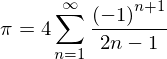

In [2]:
Eq(S.Pi, 4 * Sum(( ( (-1)**(n+1) ) / (2*n-1)), (n,1,oo)))

In [3]:
from timeit import default_timer as timer
import numpy as np

## Function to calculate Pi

### Serial Processering

In [4]:
def CalculatePi_Serial(N): # Do not recomend to use with larget N values
    start = timer()
    pi = 0
    for n in range(1, N):
        pi += (4.0 * ( (-1)**(n+1) ) / (2*n-1) ) 
    dt = timer() - start
    print('Serial calculate time   {:e} s'.format(dt))
    return pi

### Parallel Processering
#### Using Numba (https://numba.pydata.org/)

In [5]:
from numba import autojit
@autojit
def CalculatePi_Parallel(N):
    start = timer()
    pi = 0
    for n in range(1, N):
        pi += (4.0 * ( (-1)**(n+1) ) / (2*n-1) ) 
    dt = timer() - start
    print('Parallel calculate time {:e} s'.format(dt))
    return pi

## Sample Pi Claculation (Serial)

In [6]:
N =10000
PI = CalculatePi_Serial(N)
difference = PI-np.pi
print('  N = {}'.format(N))
print('* Gregory-Leibniz Series = {}'.format(PI))
print('* Pi value in Numpy      = {}'.format(np.pi))
print('* Difference             = {:e}'.format(difference))
print('* % Difference           = {:%}'.format(difference/np.pi))

Serial calculate time   5.346737e-03 s
  N = 10000
* Gregory-Leibniz Series = 3.1416926635905345
* Pi value in Numpy      = 3.141592653589793
* Difference             = 1.000100e-04
* % Difference           = 0.003183%


## Run time performance Parallel vs. Serial 

In [7]:
N =1000000
PI_S = CalculatePi_Serial(N)
PI_P = CalculatePi_Parallel(N)

Serial calculate time   6.469327e-01 s
Parallel calculate time 1.385321e-01 s


## Comparing Accuract vs. N

In [8]:
N = np.array([1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])
PI = []
for n in N:
    PI.append(CalculatePi_Parallel(n))
PI = np.array(PI)
NumpyPI = np.pi
Difference = (PI-NumpyPI)/NumpyPI

Parallel calculate time 9.873287e-06 s
Parallel calculate time 9.979072e-05 s
Parallel calculate time 1.409059e-03 s
Parallel calculate time 1.146712e-02 s
Parallel calculate time 1.213155e-01 s
Parallel calculate time 9.106245e-01 s
Parallel calculate time 8.647477e+00 s


In [9]:
Difference = abs(PI-NumpyPI)/NumpyPI
for i in range(len(N)):
    print('* Pi [N = {:18}] = {:.36} ({:.8%})'.format(N[i], PI[i], Difference[i]))
print('* Pi [Numpy]                  = {:.36}'.format(np.pi))

* Pi [N =               1000] = 3.14259365434004411810064993915148079 (0.03186284%)
* Pi [N =              10000] = 3.14169266359053445114568603457883 (0.00318342%)
* Pi [N =             100000] = 3.14160265368972035915362539526540786 (0.00031831%)
* Pi [N =            1000000] = 3.14159365359077424884048923559021205 (0.00003183%)
* Pi [N =           10000000] = 3.14159275358980139003506337758153677 (0.00000318%)
* Pi [N =          100000000] = 3.14159266358932587337449149345047772 (0.00000032%)
* Pi [N =         1000000000] = 3.14159265458805059267888282192870975 (0.00000003%)
* Pi [Numpy]                  = 3.14159265358979311599796346854418516


In [10]:
import matplotlib.pyplot as plt
plt.plot(N, PI, "r-o")
plt.axhline(np.pi)
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Pi')
plt.show()

<Figure size 640x480 with 1 Axes>

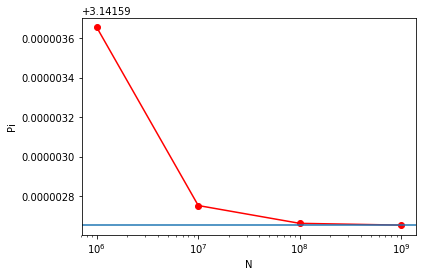

In [11]:
plt.plot(N[3:], PI[3:], "r-o")
plt.axhline(np.pi)
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Pi')
plt.show()

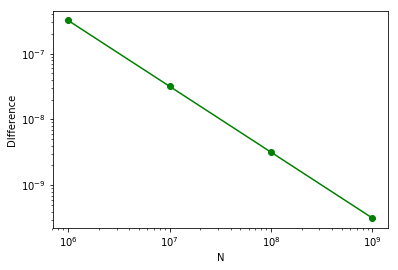

In [12]:
plt.plot(N[3:], Difference[3:], "g-o")
plt.axhline(0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('DIfference')
plt.show()